In [1]:
import pandas as pd

df = pd.read_csv("ecommerce_customer_data.csv")
df.head()


,Invoice_ID,Customer_ID,Purchase_Date,Category,Quantity,Unit_Price,Total_Amount,Country
0,INV10001,CUST476,2023-01-08,Electronics,3,3772,11316,UK
1,INV10002,CUST420,2023-01-06,Sports,4,3742,14968,UK
2,INV10003,CUST153,2023-07-08,Sports,3,3716,11148,UK
3,INV10004,CUST183,2023-10-05,Beauty,2,961,1922,USA
4,INV10005,CUST420,2023-04-06,Home,5,3642,18210,India


In [2]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])


In [3]:
import datetime as dt

today = df['Purchase_Date'].max() + dt.timedelta(days=1)

rfm = df.groupby('Customer_ID').agg({
    'Purchase_Date': lambda x: (today - x.max()).days,
    'Invoice_ID': 'count',
    'Total_Amount': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
Customer_ID,,,
CUST1,53,4,18410
CUST10,45,2,20096
CUST100,240,2,3583
CUST101,89,7,49713
CUST102,261,2,21046


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


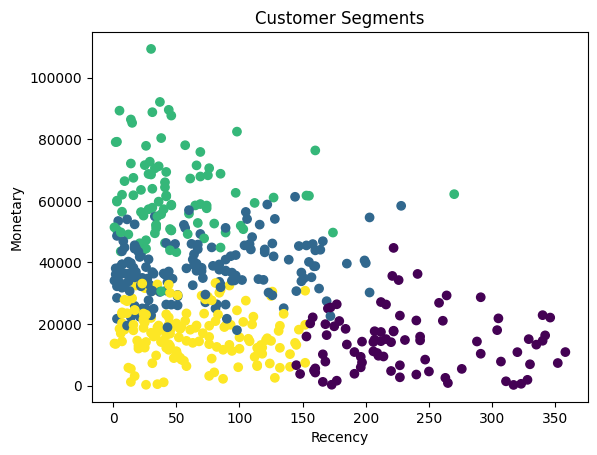

In [6]:
import matplotlib.pyplot as plt

plt.scatter(rfm['Recency'], rfm['Monetary'], c=rfm['Cluster'])
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.title("Customer Segments")
plt.show()


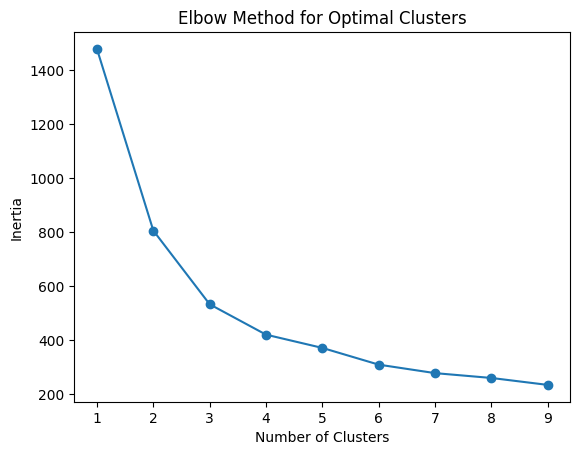

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()


Based on elbow curve, 4 clusters were selected.

In [8]:
cluster_summary = rfm.groupby('Cluster').mean()
cluster_summary


,Recency,Frequency,Monetary
Cluster,,,
0,233.047619,2.047619,14051.880952
1,69.260606,4.684848,37847.151515
2,49.752688,7.021505,62132.301075
3,64.198675,2.662252,17044.973510


Cluster 2 – VIP Customers: Highest frequency and monetary value. Core revenue drivers.

Cluster 1 – High-Value Customers: Strong spending behavior with moderate frequency.

Cluster 3 – Low Engagement Customers: Recent buyers with low spending potential.

Cluster 0 – At-Risk Customers: Long inactivity and low purchase frequency.

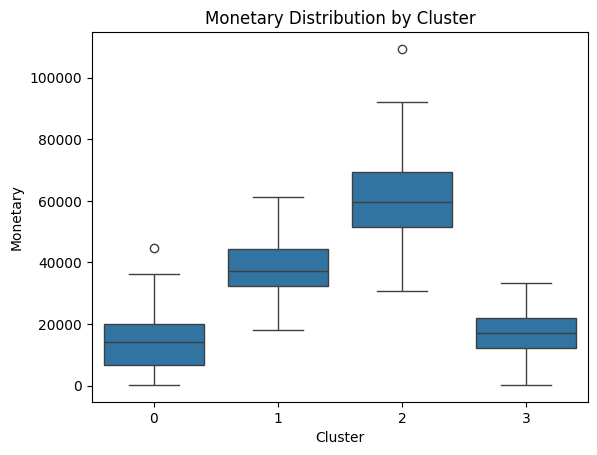

In [9]:
import seaborn as sns

sns.boxplot(x='Cluster', y='Monetary', data=rfm)
plt.title("Monetary Distribution by Cluster")
plt.show()


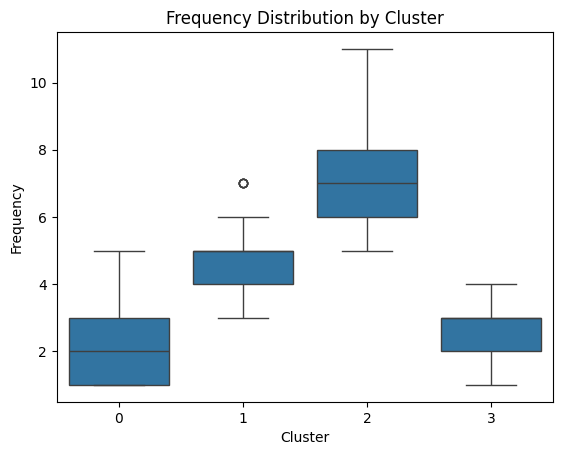

In [10]:
sns.boxplot(x='Cluster', y='Frequency', data=rfm)
plt.title("Frequency Distribution by Cluster")
plt.show()


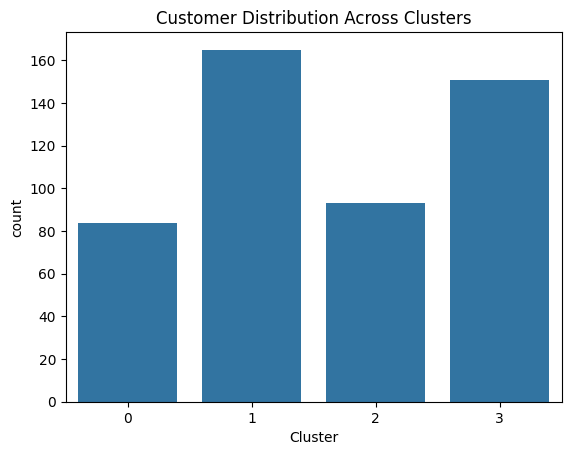

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Cluster', data=rfm)
plt.title("Customer Distribution Across Clusters")
plt.show()


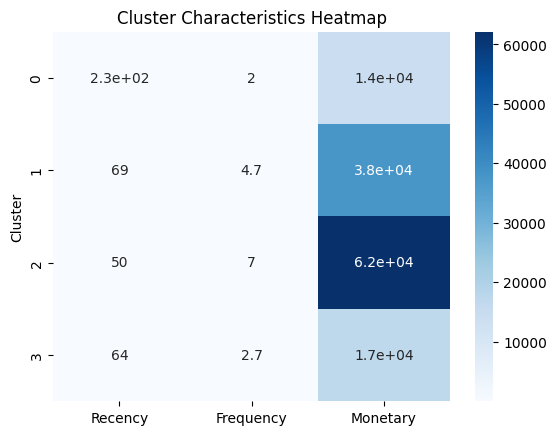

In [12]:
sns.heatmap(cluster_summary, annot=True, cmap="Blues")
plt.title("Cluster Characteristics Heatmap")
plt.show()
